# 1. Earnings Surprises and Stock Prices

## Loading data

In this exercise you will analyze the response of stock prices to earning surprises.

First we load data on earnings and prices of stocks.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

data = pd.read_excel('https://drive.google.com/uc?export=download&id=1qlEHSpvGU12I72hnJFKz7OGF_GcKbR-W')

In [ ]:
data.head()

,t,comnam,ticker,medact,adj,medest60,rawwin1,rawwin375,netwin1,netwin375,carwin1,carwin375,stdest60,lagprice,lagshr,firstletter
0,1998-04-16,A B C BANCORP,ABCB,0.0208,1.44,0.0903,-2.158300e-02,-0.099881,-0.023982,-0.063421,-0.021887,-0.095255,NaN,18.0000,7252,A
1,1998-07-14,A B C BANCORP,ABCB,0.1528,1.44,NaN,-2.900000e-11,-0.192095,-0.007730,-0.072367,-0.005881,-0.100999,NaN,16.0625,7252,A
2,1998-10-08,A B C BANCORP,ABCB,0.1458,1.44,0.1736,-3.517600e-02,0.002857,-0.043592,-0.271545,-0.041434,-0.201206,NaN,12.4063,7245,A
3,1999-01-13,A B C BANCORP,ABCB,0.3403,1.44,0.2083,-9.709000e-03,0.181186,0.011724,0.095208,0.012269,0.093023,NaN,12.8750,7245,A
4,1999-10-11,A B C BANCORP,ABCB,0.2083,1.44,0.2083,-4.831000e-03,-0.077209,0.009069,-0.236437,0.007008,-0.212830,NaN,12.9375,7270,A


## Variable List

- medact: median actual earnings

- adj: adjustment factor

- medest60: median earnings forecasts in the last 60 days

- rawwin1: raw returns (0, +1)

- rawwin375: raw returns (3, 75)

- netwin1: net returns (0, +1)

- netwin375: net returns (3, 75)

- carwin1: adjusted returns (0, +1)

- carwin375: adjusted returns (3, 75)

- stdest60: stand deviation of earning forecast

- comnam: company name

- lagshr: lagged number of shares outstanding


**1. Construct the earnings surprises.Calculate the mean and standard errors.**



In [ ]:
data['S'] = ((data['adj']*data['medact'])- (data['adj']*data['medest60']))/data['lagprice']

In [ ]:
data.head()

,t,comnam,ticker,medact,adj,medest60,rawwin1,rawwin375,netwin1,netwin375,carwin1,carwin375,stdest60,lagprice,lagshr,firstletter,S
0,1998-04-16,A B C BANCORP,ABCB,0.0208,1.44,0.0903,-2.158300e-02,-0.099881,-0.023982,-0.063421,-0.021887,-0.095255,NaN,18.0000,7252,A,-0.005560
1,1998-07-14,A B C BANCORP,ABCB,0.1528,1.44,NaN,-2.900000e-11,-0.192095,-0.007730,-0.072367,-0.005881,-0.100999,NaN,16.0625,7252,A,NaN
2,1998-10-08,A B C BANCORP,ABCB,0.1458,1.44,0.1736,-3.517600e-02,0.002857,-0.043592,-0.271545,-0.041434,-0.201206,NaN,12.4063,7245,A,-0.003227
3,1999-01-13,A B C BANCORP,ABCB,0.3403,1.44,0.2083,-9.709000e-03,0.181186,0.011724,0.095208,0.012269,0.093023,NaN,12.8750,7245,A,0.014763
4,1999-10-11,A B C BANCORP,ABCB,0.2083,1.44,0.2083,-4.831000e-03,-0.077209,0.009069,-0.236437,0.007008,-0.212830,NaN,12.9375,7270,A,0.000000


In [ ]:
S_avg = data['S'].mean()
S_avg

-0.07019397927328998

In [ ]:
S_SE = data['S'].std()/np.sqrt(np.size(data['S']))
S_SE

0.060285496899138466

**What is the mean and standard errors?**

Answer:

The mean equels -0.07 which means on average the earnings surprise is below expectation by 7%. The standard error is 0.06

In [ ]:
df = data.dropna()

In [ ]:
df.shape

(22624, 17)

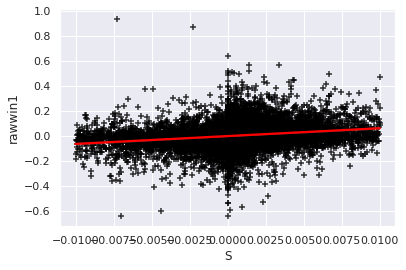

In [ ]:
# draw regplot for earnings surprise
sns.regplot(x = "S",
            y = "rawwin1",
            data = df1,  marker="+", ci = 95,
                    scatter_kws={"color": "black"}, line_kws={"color": "red"})

# show the plot
plt.show()

**2. Estimate an OLS model to relate raw returns r (variable “RAWWIN1”) to s as
a measure of surprise**
$$r^{(0,1)}_{tk}=\alpha_{0}+\phi_{}s_{tk}+\epsilon_{tk}$$

In [ ]:
import statsmodels.formula.api as smf

formula = 'rawwin1 ~ S'
results = smf.ols(formula, df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                rawwin1   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     16.12
Date:                Mon, 06 Mar 2023   Prob (F-statistic):           5.97e-05
Time:                        17:27:39   Log-Likelihood:                 23999.
No. Observations:               22624   AIC:                        -4.799e+04
Df Residuals:                   22622   BIC:                        -4.798e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0023      0.001      4.146      0.0


**How do you interprete $\phi_{}$?**

Answer:






$\phi_{}$ represents the coefficient of the earnings surprise $s_{tk}$, which measures the unexpected profit as a share of the total market value of a company. Here we see that $\phi_{}$ = 0.04, meaning that the company earned unexpected profit equel to 4% of the firm's value.

**Does the coefficient $\phi$ change if restricting the sample
to $s_{tk}$ in the range [−0.01, 0.01] and then in the range [−0.001, 0.001]?**

Answer:

In [ ]:
df1 = df[(df['S']>-0.01) & (df['S']<0.01)]
df2 = df[(df['S']>-0.001) & (df['S']<0.001)]

In [ ]:
df1.shape

(20957, 17)

In [ ]:
#Using [-0.01,0.01] restriction

formula = 'rawwin1 ~ S'
results = smf.ols(formula, df1).fit(intercept = True)
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                rawwin1   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     864.6
Date:                Mon, 06 Mar 2023   Prob (F-statistic):          2.87e-186
Time:                        17:28:02   Log-Likelihood:                 24143.
No. Observations:               20957   AIC:                        -4.828e+04
Df Residuals:                   20955   BIC:                        -4.827e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0003      0.001      0.494      0.6

In [ ]:
#Using [-0.001,0.001] restriction

formula = 'rawwin1 ~ S'
results = smf.ols(formula, df2).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                rawwin1   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     206.9
Date:                Mon, 06 Mar 2023   Prob (F-statistic):           1.65e-46
Time:                        17:19:33   Log-Likelihood:                 14266.
No. Observations:               11703   AIC:                        -2.853e+04
Df Residuals:                   11701   BIC:                        -2.851e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0048      0.001     -6.681      0.0

Yes the coefficients did change. In [-0.01, 0.01] range it is 6.27 and in [-0.001, 0.001] range its 22.3

**For questions 3-7 you only need to consider cases when $s_{tk}$ is in the range [−0.01, 0.01]**



**3. do a kernel regression of stock returns $r^{(0,1)}_{tk}$ on the earnings
surprise $s_{tk}$.**

In [ ]:
df1.shape

(20957, 17)

In [ ]:
#defining variables
x = df1['S']
y = df1['rawwin1']

In [ ]:
x.shape

(20957,)

In [ ]:
y.shape

(20957,)

In [ ]:
# spliting data into train and validation datasets
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.33, random_state = 1)

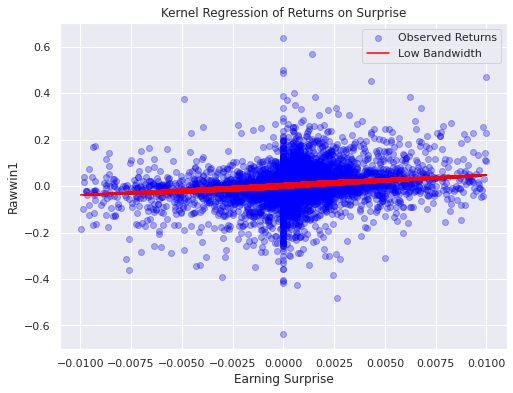

In [ ]:
#using low bandwidth

import statsmodels.api as sm
low_bw_reg = sm.nonparametric.KernelReg(train_y, train_x, reg_type='ll', var_type='c', bw=[0.001])
low_bw_pred = low_bw_reg.fit(test_x)[0]

plt.figure(figsize=(8,6))
plt.scatter(test_x, test_y, alpha=0.3, color='blue', label='Observed Returns')
plt.plot(test_x, low_bw_pred, color='red', label='Low Bandwidth')
plt.legend()
plt.title('Kernel Regression of Returns on Surprise')
plt.xlabel('Earning Surprise')
plt.ylabel('Rawwin1')

plt.show()

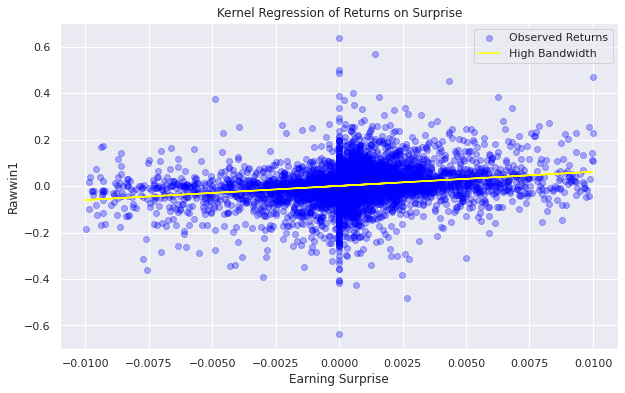

In [ ]:
#using high bandwidth

high_bw_reg = sm.nonparametric.KernelReg(train_y, train_x, reg_type='ll',var_type='c', bw=[2])
high_bw_pred = high_bw_reg.fit(test_x)[0]
plt.figure(figsize=(10,6))
plt.scatter(test_x, test_y, alpha=0.3, color='blue', label='Observed Returns')
plt.plot(test_x, high_bw_pred, color='yellow', label='High Bandwidth')
plt.legend()
plt.title('Kernel Regression of Returns on Surprise')
plt.xlabel('Earning Surprise')
plt.ylabel('Rawwin1')
plt.show()

**Is the
relationship between the stock returns and the earnings surprise linear? Provide at least one
interpretation for the observed non-linearity.**

Answer:

Not necessarily. There may be some unobserved variables that could have a non-linear impact on returns or earnings surprise that could result in a nonlinear relationship. Also, some earning surprise news could have highr impact than other news.

**4. Split the sample into a training set and a test set. Estimate
a polynomial function with degree>3 using the training set and predict the return $r^{(0,1)}$ for
the test set**

In [ ]:
df_train = df1[df1['firstletter']<="G"]
df_train.head()
df_train.shape

(15772, 17)

In [ ]:
x_train = df_train['S']
y_train = df_train['rawwin1']


In [ ]:
df_test = df1[df1['firstletter']>"G"]
df_test.head()
df_test.shape

(5185, 17)

In [ ]:
x_test = df_test['S']
y_test = df_test['rawwin1']

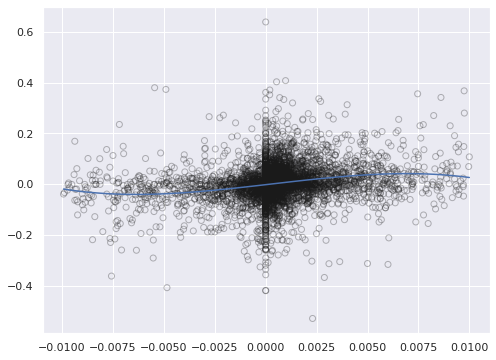

In [ ]:
weights = np.polyfit(x_train, y_train, 3)
# Generating model with the given weights
model = np.poly1d(weights)

# Prediction on validation set
pred1 = model(x_test)
# We will plot the graph for 70 observations only
xp = np.linspace(x_test.min(),x_test.max(),70)
pred_plot = model(xp)

plt.figure(figsize=(8,6))
plt.scatter(x_test, y_test, facecolor='None', edgecolor='k', alpha=0.3)
plt.plot(xp, pred_plot)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test, pred1))
print(rms)

0.07430767721761425


**What is the RMSE?**

Answer: **0.0743**

**5. Estimate a regression spline or MARS model for the training set and use the model to predict the return $r^{(0,1)}$ for the test set.**



In [ ]:
#!pip install sklearn-contrib-py-earth
!pip install git+https://github.com/scikit-learn-contrib/py-earth@v0.2dev

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/scikit-learn-contrib/py-earth (to revision v0.2dev) to /tmp/pip-req-build-vpb21g7f
  Running command git clone --filter=blob:none --quiet https://github.com/scikit-learn-contrib/py-earth /tmp/pip-req-build-vpb21g7f
  Running command git checkout -b v0.2dev --track origin/v0.2dev
  Switched to a new branch 'v0.2dev'
  Branch 'v0.2dev' set up to track remote branch 'v0.2dev' from 'origin'.
  Resolved https://github.com/scikit-learn-contrib/py-earth to commit 400f84d435b7277124535c09ca32132c1d0eaa74
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn-contrib-py-earth: filename=sklearn_contrib_py_earth-0.1.0+16.g400f84d-cp38-cp38-linux_x86_64.whl size=5810329 sha256=a2c1af1df29653df995ba5aa66cddfae44284beeb640afedaa6ef40a6874cd6d
  Stored in directory: /tmp/pip-ephem-wheel-cache-ml4u8l49/wheels/8a/33/e4/b577aeaf3435222ffd76339bd728390afc103237af5c

In [ ]:
from pyearth import Earth

In [ ]:
mars = Earth()

mars.fit(x_train.array.reshape(-1,1), y_train)

pred_mars = mars.predict(x_test.array.reshape(-1,1))

rms_mars = sqrt(mean_squared_error(y_test, pred_mars))

print(rms_mars)

0.07418176057589684


**What is the RMSE?**

Answer: **0.0741**

We notice the RMSE if for MARS than polynomial regression, indidcating its better at predicting raw returns.

**6. Estimate kernel regression for the training set, and use the model to predict the
return $r^{(0,1)}$ for the test set.**



In [ ]:
Kernel_reg = sm.nonparametric.KernelReg(y_train, x_train, reg_type='ll', var_type='c')
bw = Kernel_reg.bw[0]
print(bw)


0.0003973524303164126


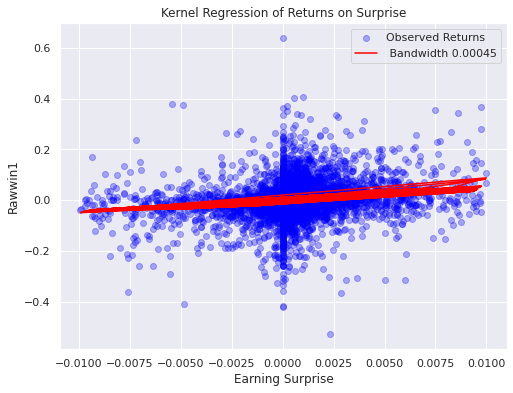

In [ ]:
Kernel_reg = sm.nonparametric.KernelReg(y_train, x_train, reg_type='ll', var_type='c', bw = [0.0003973524303164126])
Kernel_pred = Kernel_reg.fit(x_test)[0]

plt.figure(figsize=(8,6))
plt.scatter(x_test, y_test, alpha=0.3, color='blue', label='Observed Returns')
plt.plot(x_test, Kernel_pred, color='red', label=' Bandwidth 0.00045')
plt.legend()
plt.title('Kernel Regression of Returns on Surprise')
plt.xlabel('Earning Surprise')
plt.ylabel('Rawwin1')

plt.show()

In [ ]:
# calculate the RMSE
rmse = mean_squared_error(y_test, Kernel_pred, squared=False)
print('RMSE:', rmse)

RMSE: 0.07410720119007608


In [ ]:
actual = y_test
prediction = Kernel_pred

datacom = {'actual': actual, "preds": prediction}
Comparison = pd.DataFrame(datacom)
Comparison.head()

,actual,preds
22561,0.161765,0.021289
22562,-0.037037,0.013429
22563,0.019337,0.016057
22564,0.096491,0.020952
22565,-0.016667,0.019123


**What is the RMSE?**

Answer: **RMSE = 0.07410**

**7. Which model from part 4 to part 6 has the best prediction in the test sample? Use
that model （or the second best model） and the whole sample to predict raw returns $r^{(3,75)}$ (variable “RAWWIN375”) as
a function of earnings surprise and plot the relationship.**



The RMSE was mostly similiar across models, MARS and KR both gave very close RMSE. So, we will run MARS and KR

In [ ]:
#defining variables
x = df1['S']
y = df1['rawwin1']

In [ ]:
mars = Earth()

mars.fit(x.array.reshape(-1,1), y)

pred_mars = mars.predict(x_test.array.reshape(-1,1))

rms_mars = sqrt(mean_squared_error(y_test, pred_mars))

print(rms_mars)

0.07406087099539024


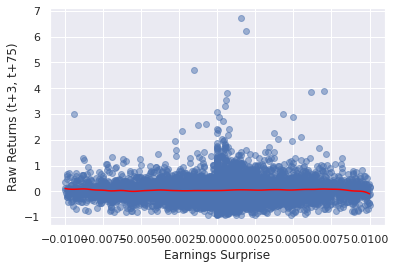

In [ ]:
from statsmodels.nonparametric.kernel_regression import KernelReg

# define the variables
x1 = df1['S'].values.reshape(-1, 1)
y1 = df1['rawwin375'].values

# fit the kernel regression model
kr = KernelReg(y1, x1, var_type='c')
s = np.linspace(-0.01, 0.01, 100)
y_pred = kr.fit(s)[0]

# plot the relationship
import matplotlib.pyplot as plt
plt.scatter(x1, y1, alpha=0.5)
plt.plot(s, y_pred, color='red')
plt.xlabel('Earnings Surprise')
plt.ylabel('Raw Returns (t+3, t+75)')
plt.show()



In [ ]:
Kernel_pred2 = kr.fit(x_test)[0]


In [ ]:
# calculate the RMSE
rmse = mean_squared_error(y_test, Kernel_pred2, squared=False)
print('RMSE:', rmse)

RMSE: 0.08441215876997728


**What does the theory of efficient
financial markets predict the relationship to be? What do you find?**

Answer:



**8. Plot the kernel density of this variable for
values between -0.1 and 0.1 using bandwidth of 0.0025.**



In [ ]:
# calculate the earnings surprise per share
data['eps'] = (data['adj'] *data['medact']) - (data['adj'] *data['medest60'])
# subset the data to eps in [-0.1, 0.1]
df3 = data[(data['eps'] >= -0.1) & (data['eps'] <= 0.1)]
X =  df3[['eps']]


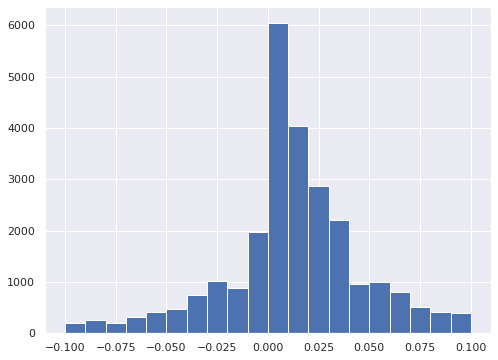

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(df3['eps'] , bins=20)
plt.show()

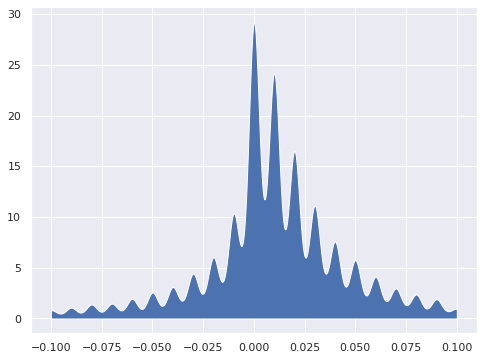

In [ ]:
from sklearn.neighbors import KernelDensity

X =  df3[['eps']].values
x_d = np.linspace(-0.1, 0.1, 1000)
kde = KernelDensity(bandwidth=0.0025, kernel='gaussian')

kde.fit(X)
log_dens = kde.score_samples(x_d[:, None])

plt.figure(figsize=(8,6))
plt.fill_between(x_d, np.exp(log_dens))
plt.show()

**Is there a discontinous jump in the
density at zero? Interpret your result relating to manipulation of earnings.**

Answer:

# 2. Survival of Cryptocurrencies

In this exercise, we will analyze the survival rate of over 2,000 cryptocurrencies
that are or were previously traded on cryptocurrency exchanges

## Loading data



In [ ]:
data = pd.read_excel('https://drive.google.com/uc?export=download&id=1MuBiOzSZ9W9sAtnXGFuPvrSrZSCpJxl6')
data.head()

,symbol,name,price0,volume0,firstweek,lastweek
0,$$$,Money,3.500000e-05,132.0,134,293
1,$MINE,InstaMineNuggets,2.893000e-03,290.0,99,131
2,$MINEW,InstaMineNuggets A,7.130000e-04,328.0,99,129
3,$MINEZ,InstaMineNuggets B,1.572000e-03,709.0,99,129
4,$PAC,PACcoin,1.080000e-08,4.0,133,325


## Variable List

- symbol: Symbol

- name: Name

- price0:  price of the first week it started trading

- volume0: average daily trading volume of the first week

- firstweek: first week it started trading on exchange

- lastweek: last week it is traded on the exchanges




In [ ]:
!pip install lifelines
from lifelines import CoxPHFitter
from lifelines.utils import k_fold_cross_validation
from lifelines import KaplanMeierFitter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**1. Prepare the data for survival analysis by creating a dummy variable for exit (which
equals one if the cryptocurrency has been delisted from the exchange by the last week of the
sample) and a time variable**

In [ ]:
data['Exit'] = ''
data.loc[data['lastweek'] < 354, 'Exit'] = 1
data.loc[data['lastweek'] == 354, 'Exit'] = 0

data.head()

,symbol,name,price0,volume0,firstweek,lastweek,Exit
0,$$$,Money,3.500000e-05,132.0,134,293,1
1,$MINE,InstaMineNuggets,2.893000e-03,290.0,99,131,1
2,$MINEW,InstaMineNuggets A,7.130000e-04,328.0,99,129,1
3,$MINEZ,InstaMineNuggets B,1.572000e-03,709.0,99,129,1
4,$PAC,PACcoin,1.080000e-08,4.0,133,325,1


In [ ]:
data.shape

(2955, 7)

In [ ]:
data['Time'] = data['lastweek']-data['firstweek']
data.head()

,symbol,name,price0,volume0,firstweek,lastweek,Exit,Time
0,$$$,Money,3.500000e-05,132.0,134,293,1,159
1,$MINE,InstaMineNuggets,2.893000e-03,290.0,99,131,1,32
2,$MINEW,InstaMineNuggets A,7.130000e-04,328.0,99,129,1,30
3,$MINEZ,InstaMineNuggets B,1.572000e-03,709.0,99,129,1,30
4,$PAC,PACcoin,1.080000e-08,4.0,133,325,1,192


**2. Plot the survival curve for cryptocurrencies using the Kaplan-Meier method**

In [ ]:
kmf = KaplanMeierFitter()

kmf.fit(durations = data['Time'], event_observed = data['Exit'])

/usr/local/lib/python3.8/dist-packages/lifelines/utils/__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 2955 total observations, 1603 right-censored observations>

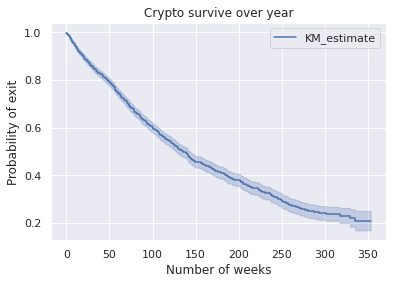

In [ ]:
plt.figure()
kmf.plot()
plt.title("Crypto survive over year")
plt.ylabel("Probability of exit")
plt.xlabel('Number of weeks')
plt.show()

**On
average what fraction of cryptocurrencies survive over a year (52 weeks)?**

Answer:

*on average 66.3% of cryptocurrencies survive over 52 week*

In [ ]:
col = data['Time']
count = col[col>52].count()
avg_surv_52 = (count/2955)*100
print(avg_surv_52)

66.32825719120136


**3. Compare the survival curves for cryptocurrencies that are originated on or before
January 1, 2017 (week 192) vs cryptocurrencies that are originated after the date.**

Text(0, 0.5, 'Probability of survival')

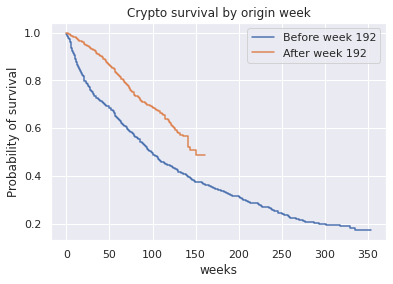

In [ ]:
T = data['Time']
E = data['Exit']

plt.figure()
ax = plt.subplot(111)

a = (data['firstweek'] <= 192)
kmf.fit(T[a], event_observed=E[a], label="Before week 192")
kmf.plot(ax=ax, ci_force_lines=False, ci_show=False)

b = (data['firstweek'] > 192)
kmf.fit(T[b], event_observed=E[b], label="After week 192")
kmf.plot(ax=ax, ci_force_lines=False, ci_show=False)

plt.title("Crypto survival by origin week")
plt.xlabel('weeks')
plt.ylabel('Probability of survival')

**Is it riskier
to buy new cryptocurrencies before or after 2017?**

Answer:

*It is riskier to buy before 2007. We notice that the survival probability for cryptocurrencies that were issued before 2007 is lower than those issued after 2007. At time zero, we see the survival probability is 100%, then as weeks pass by, the probability drops more for currencies issued before 2007 than those issued after.*

**4. Compare the survival curves for cryptocurrencies with a starting price of below 5
cents ($0.05) and above 5 cents**

Text(0, 0.5, 'Probability of survival')

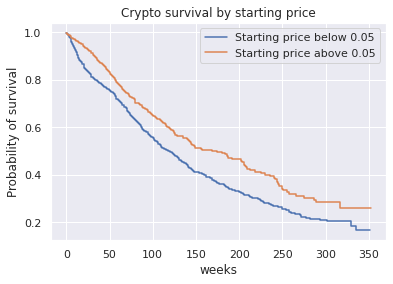

In [ ]:
T = data['Time']
E = data['Exit']

plt.figure()
ax = plt.subplot(111)

a = (data['price0'] <= 0.05)
kmf.fit(T[a], event_observed=E[a], label="Starting price below 0.05")
kmf.plot(ax=ax, ci_force_lines=False, ci_show=False)

b = (data['price0'] > 0.05)
kmf.fit(T[b], event_observed=E[b], label="Starting price above 0.05")
kmf.plot(ax=ax, ci_force_lines=False, ci_show=False)

plt.title("Crypto survival by starting price")
plt.xlabel('weeks')
plt.ylabel('Probability of survival')

**Is it riskier to buy new cryptocurrencies with a starting price
of below 5 cents or above 5 cents?**

Answer:

*It is more risky to buy cryptocurrencies with starting price below $0.05 cents than those above. From the survival curve, we see that at time 0, both start out with a probability of 100%, however, as time passes, those cryptocurrencies with stating price below 5 cents has a lower probability of survival. Hence, more risky.*

**5. Merge the data with “bitcoin_price.xlsx” to get the price and supply of Bitcoins
in the first week each cryptocurrency was initiated. (you should merge “FIRSTWEEK” from
ctypto.xlsx to “WEEK” from bitcoin_price.xlsx)**

In [ ]:
bitcoin_p = pd.read_excel('https://drive.google.com/uc?export=download&id=1WFXAS6Ejid7cpAvJzc3gNchSpAGn8GRJ')
bitcoin_p.head()

,name,symbol,cap,price,supply,week
0,Bitcoin,BTC,1489000000,134.21,11091325,1
1,Bitcoin,BTC,1289000000,115.91,11118050,2
2,Bitcoin,BTC,1282000000,115.00,11147675,3
3,Bitcoin,BTC,1363000000,121.99,11174725,4
4,Bitcoin,BTC,1495000000,133.48,11202375,5


In [ ]:
merged_df = pd.merge(data, bitcoin_p, how= 'left', left_on = 'firstweek', right_on = 'week')

In [ ]:
merged_df.shape

(2955, 14)

In [ ]:
merged_df.head()

,symbol_x,name_x,price0,volume0,firstweek,lastweek,Exit,Time,name_y,symbol_y,cap,price,supply,week
0,$$$,Money,3.500000e-05,132.0,134,293,1,159,Bitcoin,BTC,4752000000,320.17,14843750,134
1,$MINE,InstaMineNuggets,2.893000e-03,290.0,99,131,1,32,Bitcoin,BTC,3994000000,286.39,13944575,99
2,$MINEW,InstaMineNuggets A,7.130000e-04,328.0,99,129,1,30,Bitcoin,BTC,3994000000,286.39,13944575,99
3,$MINEZ,InstaMineNuggets B,1.572000e-03,709.0,99,129,1,30,Bitcoin,BTC,3994000000,286.39,13944575,99
4,$PAC,PACcoin,1.080000e-08,4.0,133,325,1,192,Bitcoin,BTC,5532000000,373.37,14816675,133


In [ ]:
merged_df1 =merged_df.drop(['name_y','symbol_y','cap','week'], axis =1)

In [ ]:
merged_df1.head()

,symbol_x,name_x,price0,volume0,firstweek,lastweek,Exit,Time,price,supply
0,$$$,Money,3.500000e-05,132.0,134,293,1,159,320.17,14843750
1,$MINE,InstaMineNuggets,2.893000e-03,290.0,99,131,1,32,286.39,13944575
2,$MINEW,InstaMineNuggets A,7.130000e-04,328.0,99,129,1,30,286.39,13944575
3,$MINEZ,InstaMineNuggets B,1.572000e-03,709.0,99,129,1,30,286.39,13944575
4,$PAC,PACcoin,1.080000e-08,4.0,133,325,1,192,373.37,14816675


**6. Estimate a Cox proportional hazard model using the following variables to predict survival of
cryptocurrencies:**

- Log starting price (log(PRICE0))

- Log average volume in first week (log(VOLIME0))

- Log price of bitcoin in the first week

- A dummy variable for whether it is initiated after January 1 2017





In [ ]:
from scipy.stats.morestats import log
from numpy import log as ln

#creating log price0
merged_df1['logprice0'] = ln(merged_df1['price0'])
merged_df1.head()

<ipython-input-205-53939556d804>:1: DeprecationWarning: Please use `log` from the `scipy.stats` namespace, the `scipy.stats.morestats` namespace is deprecated.
  from scipy.stats.morestats import log


,symbol_x,name_x,price0,volume0,firstweek,lastweek,Exit,Time,price,supply,logprice0
0,$$$,Money,3.500000e-05,132.0,134,293,1,159,320.17,14843750,-10.260162
1,$MINE,InstaMineNuggets,2.893000e-03,290.0,99,131,1,32,286.39,13944575,-5.845461
2,$MINEW,InstaMineNuggets A,7.130000e-04,328.0,99,129,1,30,286.39,13944575,-7.246029
3,$MINEZ,InstaMineNuggets B,1.572000e-03,709.0,99,129,1,30,286.39,13944575,-6.455407
4,$PAC,PACcoin,1.080000e-08,4.0,133,325,1,192,373.37,14816675,-18.343720


In [ ]:
#creating log volume

merged_df1['logvolume'] = ln(merged_df1['volume0'])
merged_df1.head()

,symbol_x,name_x,price0,volume0,firstweek,lastweek,Exit,Time,price,supply,logprice0,logvolume
0,$$$,Money,3.500000e-05,132.0,134,293,1,159,320.17,14843750,-10.260162,4.882802
1,$MINE,InstaMineNuggets,2.893000e-03,290.0,99,131,1,32,286.39,13944575,-5.845461,5.669881
2,$MINEW,InstaMineNuggets A,7.130000e-04,328.0,99,129,1,30,286.39,13944575,-7.246029,5.793014
3,$MINEZ,InstaMineNuggets B,1.572000e-03,709.0,99,129,1,30,286.39,13944575,-6.455407,6.563856
4,$PAC,PACcoin,1.080000e-08,4.0,133,325,1,192,373.37,14816675,-18.343720,1.386294


In [ ]:
#creating log bitcoin price

merged_df1['logprice'] = ln(merged_df1['price'])
merged_df1.head()

,symbol_x,name_x,price0,volume0,firstweek,lastweek,Exit,Time,price,supply,logprice0,logvolume,logprice
0,$$$,Money,3.500000e-05,132.0,134,293,1,159,320.17,14843750,-10.260162,4.882802,5.768852
1,$MINE,InstaMineNuggets,2.893000e-03,290.0,99,131,1,32,286.39,13944575,-5.845461,5.669881,5.657355
2,$MINEW,InstaMineNuggets A,7.130000e-04,328.0,99,129,1,30,286.39,13944575,-7.246029,5.793014,5.657355
3,$MINEZ,InstaMineNuggets B,1.572000e-03,709.0,99,129,1,30,286.39,13944575,-6.455407,6.563856,5.657355
4,$PAC,PACcoin,1.080000e-08,4.0,133,325,1,192,373.37,14816675,-18.343720,1.386294,5.922570


In [ ]:
#creating dummy variable if initiated after Jan 17

merged_df1['AfterJan17'] = ''
merged_df1.loc[data['firstweek'] < 192, 'AfterJan17'] = 0
merged_df1.loc[data['firstweek'] >=192 , 'AfterJan17'] = 1

In [ ]:
merged_df1.head()

,symbol_x,name_x,price0,volume0,firstweek,lastweek,Exit,Time,price,supply,logprice0,logvolume,logprice,AfterJan17
0,$$$,Money,3.500000e-05,132.0,134,293,1,159,320.17,14843750,-10.260162,4.882802,5.768852,0
1,$MINE,InstaMineNuggets,2.893000e-03,290.0,99,131,1,32,286.39,13944575,-5.845461,5.669881,5.657355,0
2,$MINEW,InstaMineNuggets A,7.130000e-04,328.0,99,129,1,30,286.39,13944575,-7.246029,5.793014,5.657355,0
3,$MINEZ,InstaMineNuggets B,1.572000e-03,709.0,99,129,1,30,286.39,13944575,-6.455407,6.563856,5.657355,0
4,$PAC,PACcoin,1.080000e-08,4.0,133,325,1,192,373.37,14816675,-18.343720,1.386294,5.922570,0


In [ ]:
merged_df1.shape

(2955, 14)

In [ ]:
merged_df1.describe()

,price0,volume0,firstweek,lastweek,Time,price,supply,logprice0,logvolume,logprice
count,2.948000e+03,2.885000e+03,2955.000000,2955.000000,2955.000000,2955.000000,2.955000e+03,2948.000000,2885.000000,2955.000000
mean,3.632043e+02,1.373508e+06,202.073435,294.015228,91.941794,4440.670223,1.583567e+07,-3.308104,8.955998,7.646648
std,1.125191e+04,1.127095e+07,93.712205,88.626131,74.698006,4182.467981,1.791610e+06,3.558835,4.126114,1.424892
min,1.080000e-08,1.570000e-11,1.000000,16.000000,0.000000,74.560000,1.109132e+07,-18.343720,-24.877360,4.311604
25%,1.000000e-02,5.450000e+02,113.000000,258.000000,36.000000,565.040000,1.429880e+07,-4.605170,6.300786,6.336897
50%,4.047000e-02,1.056900e+04,229.000000,354.000000,77.000000,3682.840000,1.655708e+07,-3.207249,9.265680,8.211439
75%,2.700000e-01,1.505900e+05,276.000000,354.000000,118.000000,7407.410000,1.719268e+07,-1.309333,11.922316,8.910236
max,4.625050e+05,3.620000e+08,354.000000,354.000000,353.000000,19140.760000,1.819652e+07,13.044413,19.707155,9.859575


In [ ]:
combined_df = merged_df1.drop([ 'symbol_x','name_x'], axis =1)

In [ ]:
combined_dfn = merged_df1.drop([ 'symbol_x','name_x', 'price0', 'volume0', 'price', 'supply'], axis =1)
combined_dfn1 = combined_dfn.dropna()

In [ ]:
combined_df.head()

,price0,volume0,firstweek,lastweek,Exit,Time,price,supply,logprice0,logvolume,logprice,AfterJan17
0,3.500000e-05,132.0,134,293,1,159,320.17,14843750,-10.260162,4.882802,5.768852,0
1,2.893000e-03,290.0,99,131,1,32,286.39,13944575,-5.845461,5.669881,5.657355,0
2,7.130000e-04,328.0,99,129,1,30,286.39,13944575,-7.246029,5.793014,5.657355,0
3,1.572000e-03,709.0,99,129,1,30,286.39,13944575,-6.455407,6.563856,5.657355,0
4,1.080000e-08,4.0,133,325,1,192,373.37,14816675,-18.343720,1.386294,5.922570,0


In [ ]:
#Cox proportional hazard model
combined_df = combined_df.dropna()
cph = CoxPHFitter()
cph.fit(combined_dfn1, 'Time', event_col='Exit')
cph.summary

/usr/local/lib/python3.8/dist-packages/lifelines/utils/__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
/usr/local/lib/python3.8/dist-packages/lifelines/utils/__init__.py:1122: ConvergenceWarning: Column lastweek have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['Exit'].astype(bool)
>>> print(df.loc[events, 'lastweek'].var())
>>> print(df.loc[~events, 'lastweek'].var())

A very low variance means that the column lastweek completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceW

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
firstweek,0.032289,1.032816,0.001745,0.028868,0.035710,1.029289,1.036355,0.0,18.500784,2.034926e-76,251.441559
lastweek,-0.049167,0.952023,0.001544,-0.052192,-0.046141,0.949146,0.954907,0.0,-31.848431,1.383817e-222,736.999384
logprice0,-0.000263,0.999737,0.007791,-0.015533,0.015007,0.984587,1.015120,0.0,-0.033747,9.730788e-01,0.039371
logvolume,-0.029380,0.971047,0.007918,-0.044900,-0.013860,0.956093,0.986235,0.0,-3.710382,2.069471e-04,12.238450
logprice,0.057567,1.059256,0.060500,-0.061011,0.176146,0.940813,1.192612,0.0,0.951517,3.413418e-01,1.550711
AfterJan17,0.358955,1.431833,0.201515,-0.036006,0.753917,0.964634,2.125309,0.0,1.781286,7.486575e-02,3.739550


<AxesSubplot:title={'center':'Feature coefficients'}, xlabel='covariate'>

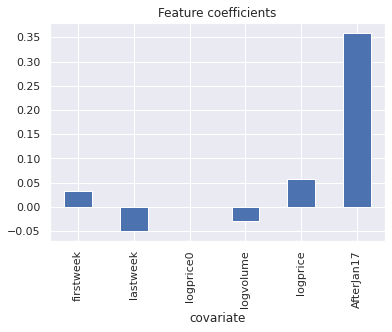

In [ ]:
plt.rcParams.update({'font.size': 9})
plt.figure()
plt.title('Feature coefficients')
cph.summary['coef'].plot(kind='bar')

**(a)What is the coefficient of the log starting price? What does the coefficient
mean?**

Answer:

The coefficient of LogPrice0 = -0.0002

A positive sign means that the hazard (risk of currency not surviving) is higher, and thus the prognosis worse, for subjects with higher values of that variable. Here we see that the log starting price coefficient sign is negative. Which means the lower the starting price, the higher the risk of not surviving.



**(b)Plot the baseline survival rate.**

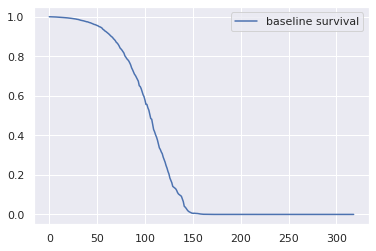

In [ ]:
#plot baseline survival rate over time
ax = cph.baseline_survival_.plot()

**On average what fraction of cryptocurrencies
survive a year?**

Answer:

Based on the graph, the survival at week 52 is around 97%.

**(c)Plot the predicted survival curve for the cryptocurrency “Nexo”.**

In [ ]:
Nexo = combined_df[(combined_df['price0']==0.31) &  (combined_df['firstweek'] ==264)]
Nexo

,price0,volume0,firstweek,lastweek,Exit,Time,price,supply,logprice0,logvolume,logprice,AfterJan17
1756,0.31,2385976.0,264,354,0,90,8723.94,17032187,-1.171183,14.685119,9.073826,1


<AxesSubplot:>

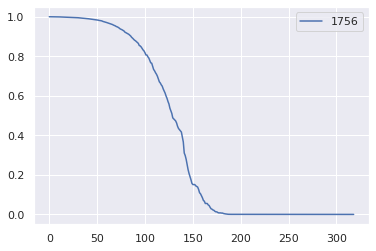

In [ ]:
cph.predict_survival_function(Nexo).plot()

**(d)Plot the predicted survival curve for a new cryptocurrency initiated in the
week of February 2, 2020 with starting price=0.03 and first week’s volume=1 million.**

In [ ]:
new_cur = {'price0':0.03,'volume0':1000000,'firstweek':354,'lastweek':354,'Exit':0,'Time':0,'price':9344.37,'supply':18196525,'logprice0':-3.50655789731998,'logvolume':13.8155105579643,'logprice':9.14252930188678,'AfterJan17':1}

In [ ]:
combined_df2 = combined_df.append(new_cur, ignore_index = True)

In [ ]:
combined_df2.shape

(2886, 12)

In [ ]:
combined_df2.head()

,price0,volume0,firstweek,lastweek,Exit,Time,price,supply,logprice0,logvolume,logprice,AfterJan17
0,3.500000e-05,132.0,134.0,293.0,1,159.0,320.17,14843750.0,-10.260162,4.882802,5.768852,0
1,2.893000e-03,290.0,99.0,131.0,1,32.0,286.39,13944575.0,-5.845461,5.669881,5.657355,0
2,7.130000e-04,328.0,99.0,129.0,1,30.0,286.39,13944575.0,-7.246029,5.793014,5.657355,0
3,1.572000e-03,709.0,99.0,129.0,1,30.0,286.39,13944575.0,-6.455407,6.563856,5.657355,0
4,1.080000e-08,4.0,133.0,325.0,1,192.0,373.37,14816675.0,-18.343720,1.386294,5.922570,0


In [ ]:
new_curve = combined_df2[(combined_df2['firstweek'] == 354) & (combined_df2['volume0'] == 1000000)]
new_curve

,price0,volume0,firstweek,lastweek,Exit,Time,price,supply,logprice0,logvolume,logprice,AfterJan17
2885,0.03,1000000.0,354.0,354.0,0.0,0.0,9344.37,18196525.0,-3.506558,13.815511,9.142529,1.0


<AxesSubplot:>

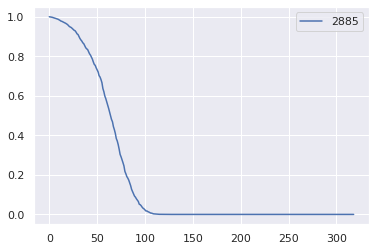

In [ ]:
cph.predict_survival_function(new_curve).plot()

**7. Use week numbers not divisible by 3 (week 1, 2, 4, 5, 7...) as training set and week
numbers dividible by 3 (week 3, 6, 9...) as test set. Estimate the Cox proportional hazard
model on the training set and predict the survival of cryptocurrencies in the test set.**

In [ ]:
train = combined_df2.loc[(combined_df2['firstweek']%3 == 1)]
train.head()

,price0,volume0,firstweek,lastweek,Exit,Time,price,supply,logprice0,logvolume,logprice,AfterJan17
4,1.080000e-08,4.000000,133.0,325.0,1,192.0,373.37,14816675.0,-18.343720,1.386294,5.922570,0
5,2.250000e+00,154768.000000,268.0,354.0,0,86.0,6786.02,17086350.0,0.810930,11.949683,8.822620,1
6,1.683130e-01,6758.000000,94.0,106.0,1,12.0,223.41,13815450.0,-1.781930,8.818482,5.409009,0
19,7.500000e-05,0.662568,118.0,176.0,1,58.0,292.69,14428050.0,-9.498022,-0.411632,5.679114,0
21,6.800000e-01,45111.000000,289.0,321.0,1,32.0,6376.13,17359937.0,-0.385662,10.716881,8.760317,1


In [ ]:
test = combined_df2.loc[(combined_df2['firstweek']%3 == 0)]
test.head()

,price0,volume0,firstweek,lastweek,Exit,Time,price,supply,logprice0,logvolume,logprice,AfterJan17
1,0.002893,290.0,99.0,131.0,1,32.0,286.39,13944575.0,-5.845461,5.669881,5.657355,0
2,0.000713,328.0,99.0,129.0,1,30.0,286.39,13944575.0,-7.246029,5.793014,5.657355,0
3,0.001572,709.0,99.0,129.0,1,30.0,286.39,13944575.0,-6.455407,6.563856,5.657355,0
9,0.000237,156.0,108.0,125.0,1,17.0,236.80,14172925.0,-8.347450,5.049856,5.467216,0
10,0.213378,375.0,153.0,232.0,1,79.0,426.77,15364500.0,-1.544690,5.926926,6.056245,0


In [ ]:
#predict the survival curves for test set

cph_2 = CoxPHFitter()

cph_2.fit(train, 'Time', event_col='Exit')

/usr/local/lib/python3.8/dist-packages/lifelines/utils/__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
/usr/local/lib/python3.8/dist-packages/lifelines/utils/__init__.py:1122: ConvergenceWarning: Column lastweek have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['Exit'].astype(bool)
>>> print(df.loc[events, 'lastweek'].var())
>>> print(df.loc[~events, 'lastweek'].var())

A very low variance means that the column lastweek completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceW

<lifelines.CoxPHFitter: fitted with 948 total observations, 487 right-censored observations>

In [ ]:
#calculate concordance score for test set

from lifelines.utils import concordance_index

print(concordance_index( test['Time'], cph_2.predict_expectation(test), test['Exit'] ) )

0.9516868844443409


**What
is the concordance index?**

Answer:

The concordance index is 0.9516.
The concordance statistic is used to measure the amount of agreement
between two variables, often a risk score and time until an event in survival
analysis. High values mean that our model predicts higher probabilities of survival for higher observed survival times.


**Add another variable that might predict the survival (for example,
you can use characteristics about the name of cryptocurrency; be creative!)**

In [ ]:
#using AfterJan27
cph_3 = CoxPHFitter()

In [ ]:
print(np.mean(k_fold_cross_validation(cph_3, combined_df2, 'Time', event_col='Exit', k=5, scoring_method="concordance_index")))

/usr/local/lib/python3.8/dist-packages/lifelines/utils/__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
/usr/local/lib/python3.8/dist-packages/lifelines/utils/__init__.py:1122: ConvergenceWarning: Column lastweek have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['Exit'].astype(bool)
>>> print(df.loc[events, 'lastweek'].var())
>>> print(df.loc[~events, 'lastweek'].var())

A very low variance means that the column lastweek completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceW

0.951251330064961


/usr/local/lib/python3.8/dist-packages/lifelines/utils/__init__.py:1122: ConvergenceWarning: Column lastweek have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['Exit'].astype(bool)
>>> print(df.loc[events, 'lastweek'].var())
>>> print(df.loc[~events, 'lastweek'].var())

A very low variance means that the column lastweek completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
/usr/local/lib/python3.8/dist-packages/lifelines/fitters/coxph_fitter.py:1611: ConvergenceWarning: Newton-Rhaphson failed to converge sufficiently. Please see the following tips in the lifelines documentation: https://lifelines.readthedocs.io/en/latest/Examples.html#problems-with-convergence-in-the-cox-pr

In [ ]:
print(concordance_index( test['AfterJan17'], cph_2.predict_expectation(test), test['Exit'] ) )

0.7646545411195694


**Does it improve
the prediction?**

Answer:

Not really. Its showing a lower concordance score.
